# 香港人均GDP 與 香港城市固體廢物總量, 香港總回收量, 香港總回收率

Model Summary:
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6.655e+06   3.74e+05     17.802      0.000    5.87e+06    7.44e+06
HK GDP per capita    -2.2985      1.203     -1.911      0.072      -4.825       0.228

R-squared: 0.1687


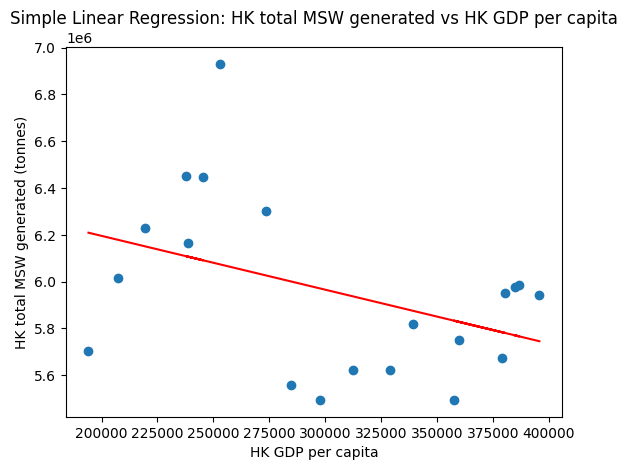

In [2]:
# !pip install pandas numpy matplotlib scikit-learn statsmodels openpyxl
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.api as sm

import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("../General Stats_G@C_clean.xlsx")

### Simple Linear Regression: HK total MSW generated vs HK GDP per capita
# Prepare data
df['HK GDP per capita'] = pd.to_numeric(df['HK GDP per capita'], errors='coerce')
df['HK total MSW generated (tonnes)'] = pd.to_numeric(
    df['HK total MSW generated (tonnes)'], errors='coerce'
)

mask = df['HK GDP per capita'].notna() & df['HK total MSW generated (tonnes)'].notna()
X_gdp = df.loc[mask, ['HK GDP per capita']]
y_msw = df.loc[mask, 'HK total MSW generated (tonnes)']

# Fit model using sklearn for predictions
lin_reg_gdp = LinearRegression()
lin_reg_gdp.fit(X_gdp, y_msw)

# Fit model using statsmodels for statistical tests
X_gdp_sm = sm.add_constant(X_gdp)  # Add constant term for intercept
model_gdp = sm.OLS(y_msw, X_gdp_sm)
results_gdp = model_gdp.fit()

# Predictions for plotting
y_pred_gdp = lin_reg_gdp.predict(X_gdp)

print("Model Summary:")
print(results_gdp.summary().tables[1])  # Print coefficient statistics
print(f"\nR-squared: {results_gdp.rsquared:.4f}")

# Plot
plt.scatter(X_gdp, y_msw)
plt.plot(X_gdp, y_pred_gdp, color='red')
plt.xlabel('HK GDP per capita')
plt.ylabel('HK total MSW generated (tonnes)')
plt.title('Simple Linear Regression: HK total MSW generated vs HK GDP per capita')
plt.show()



**GDP per capita coefficient ($\hat \beta_1$) = -2.30 (p = 0.072 > 0.05)**  

- There is **no statistically significant association** between HK GDP per capita and the total MSW generated at the 5% significance level (the relationship is only marginally significant at the 10% level). 

- The **R-squared is relatively low (~0.17)**, meaning changes in GDP per capita explain only a **limited proportion of the variation** in total MSW generated; other factors are likely more important in determining MSW generation.